# Logistic Regression on Advertising dataset

<b> Load Dataset

In [5]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [6]:
#load the dataset
data = pd.read_csv(r'C:\Users\santhosh\Downloads\advertising (1).csv')
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [7]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [8]:
data.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [9]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [6]:
data.describe(include='all')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000.00000
unique,NaN,NaN,NaN,NaN,1000,969,NaN,237,1000,NaN
top,NaN,NaN,NaN,NaN,Cloned 5thgeneration orchestration,Lisamouth,NaN,France,2016-03-27 00:53:11,NaN
freq,NaN,NaN,NaN,NaN,1,3,NaN,9,1,NaN
mean,65.000200,36.009000,55000.000080,180.000100,NaN,NaN,0.481000,NaN,NaN,0.50000
std,15.853615,8.785562,13414.634022,43.902339,NaN,NaN,0.499889,NaN,NaN,0.50025
min,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,0.000000,NaN,NaN,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,NaN,NaN,0.000000,NaN,NaN,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,NaN,NaN,0.000000,NaN,NaN,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,NaN,NaN,1.000000,NaN,NaN,1.00000


<b>Data cleaning

In [7]:
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [8]:
data.duplicated().sum()

0

<b> Exploratory Data Analysis

Text(0.5, 0, 'Age')

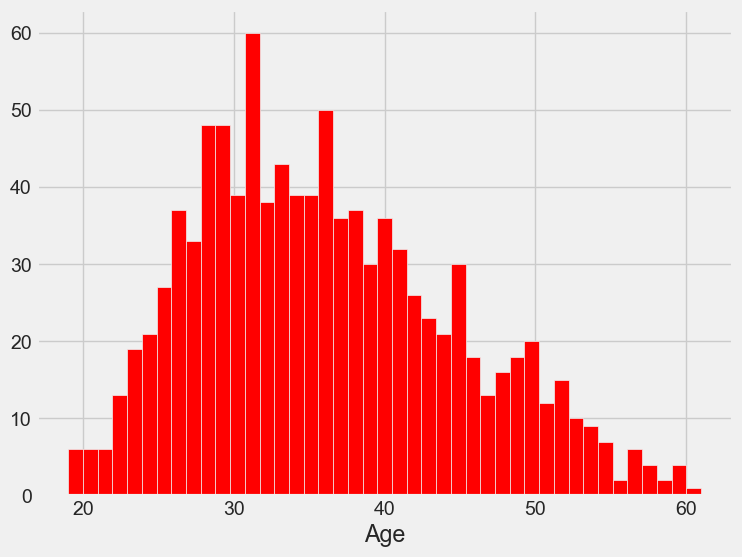

In [9]:
plt.figure(figsize=(8, 6))
data.Age.hist(bins=data.Age.nunique(), color='red')
plt.xlabel('Age')

<Figure size 800x600 with 0 Axes>

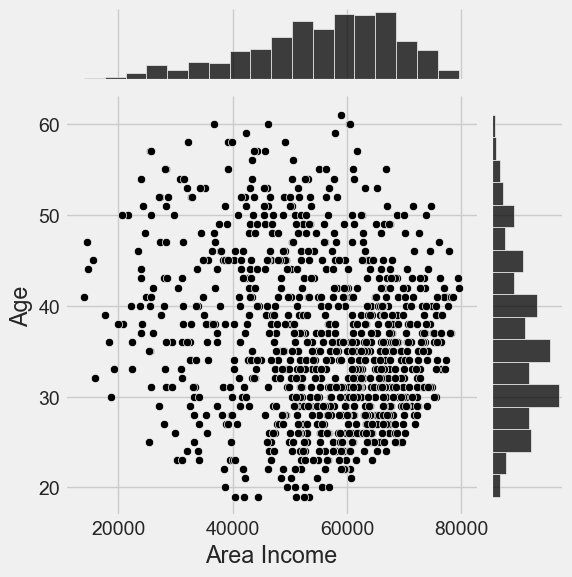

In [10]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=data["Area Income"], y=data.Age, color='black')

<Figure size 800x600 with 0 Axes>

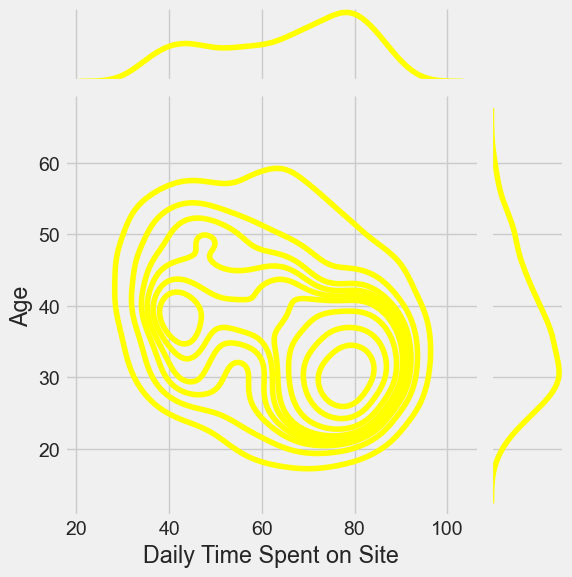

In [11]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=data["Daily Time Spent on Site"], y=data.Age, kind='kde', color='yellow')

<Figure size 800x600 with 0 Axes>

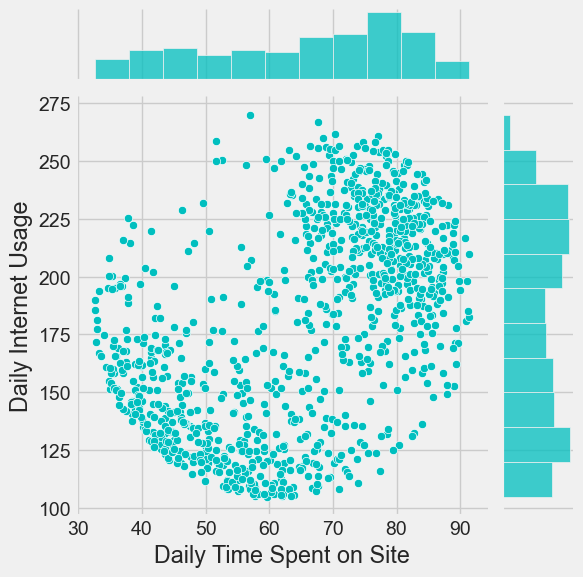

In [12]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=data["Daily Time Spent on Site"], y=data["Daily Internet Usage"], color='c')

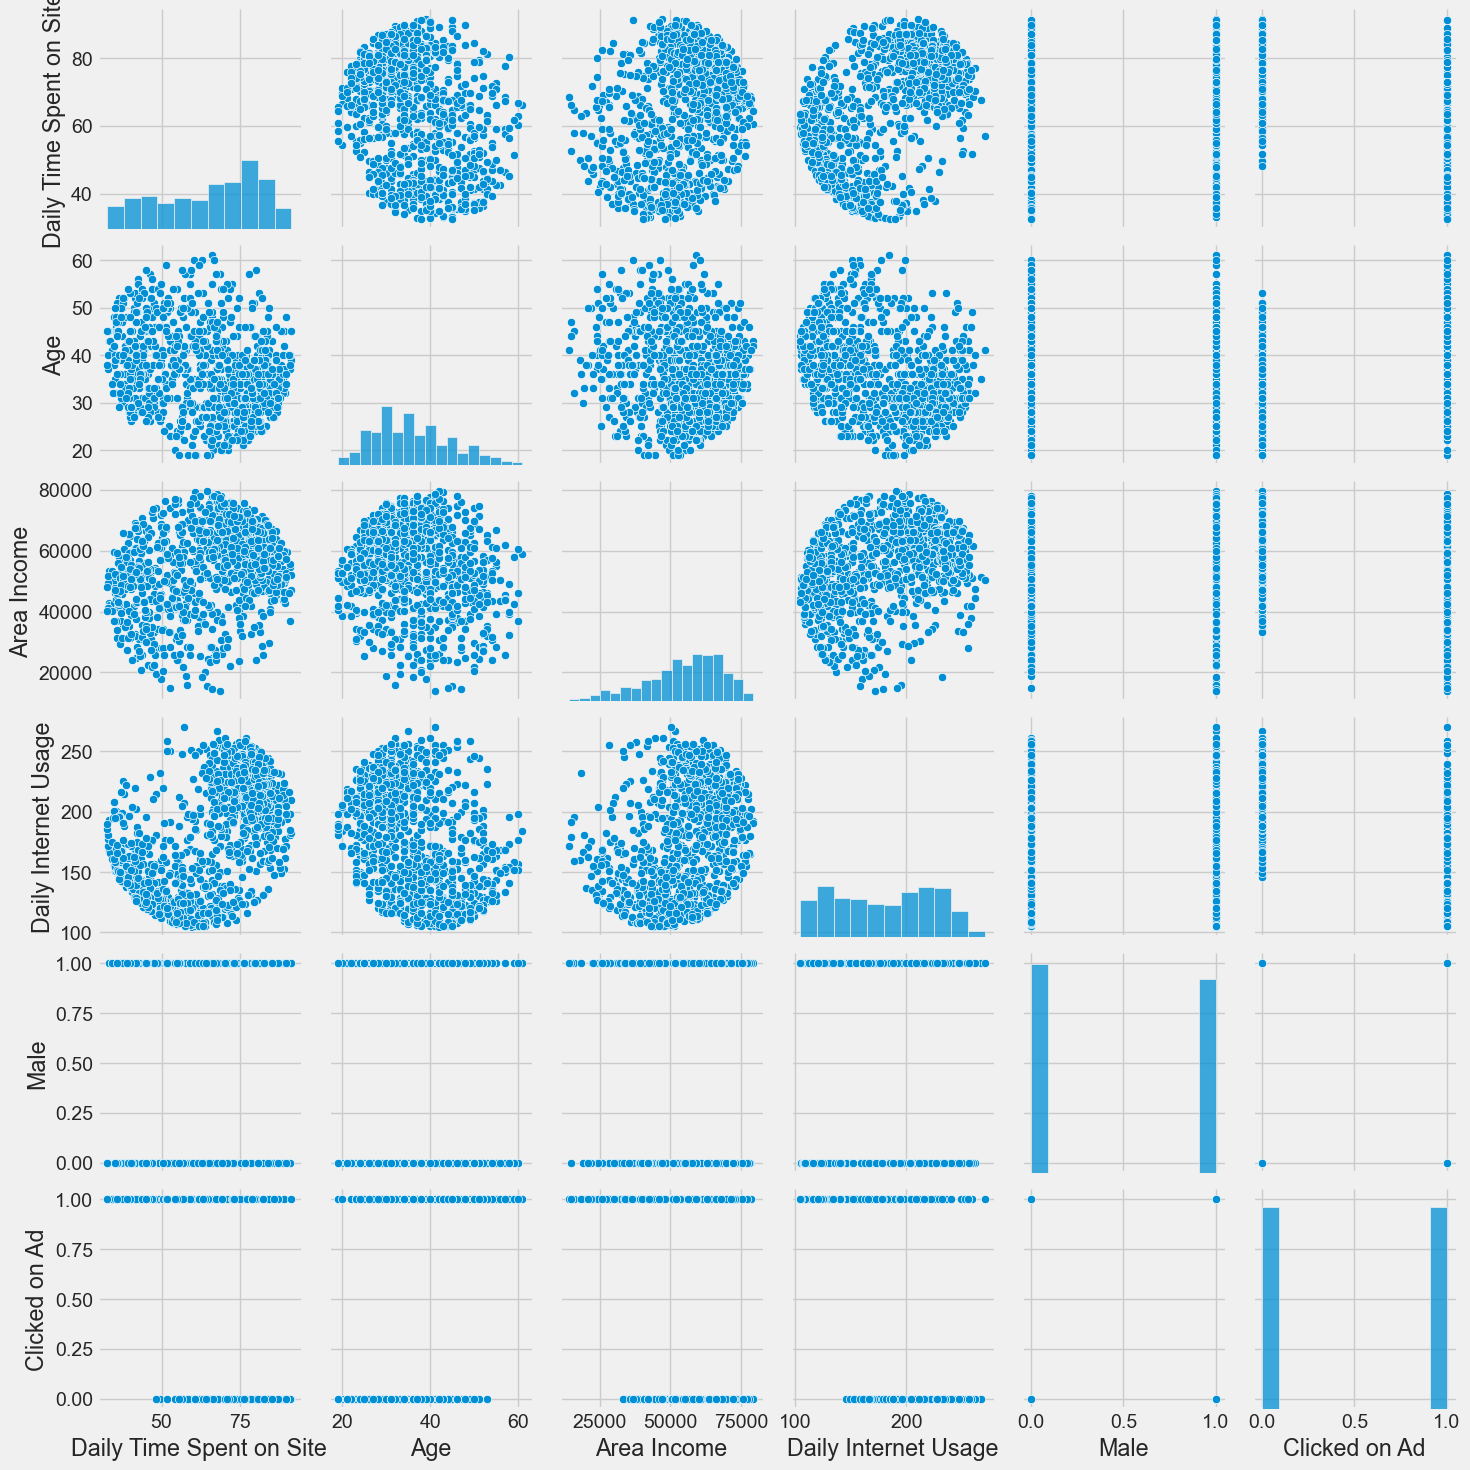

In [13]:
sns.pairplot(data)

In [14]:
data['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

<b> Applying Future Engineering

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n= ")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n=")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

<b> Train-test Split

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split


X = data.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'], axis=1)
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# cat_columns = []
num_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']


ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

<b> Applying algorithm

In [28]:
from sklearn.linear_model import LogisticRegression


lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

<b> Predicted Values

In [30]:
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
= 
Accuracy Score: 97.43%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.964088    0.985207  0.974286    0.974648      0.974527
recall       0.985876    0.962428  0.974286    0.974152      0.974286
f1-score     0.974860    0.973684  0.974286    0.974272      0.974279
support    354.000000  346.000000  0.974286  700.000000    700.000000
Confusion Matrix: 
 [[349   5]
 [ 13 333]]

Test Result:
=
Accuracy Score: 97.00%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.959732    0.980132      0.97    0.969932      0.970204
recall       0.979452    0.961039      0.97    0.970246      0.970000
f1-score     0.969492    0.970492      0.97    0.969992      0.970005
support    146.000000  154.000000      0.97  300.000000    300.000000
Confusion Matrix: 
 [[143   3]
 [  6 148]]



Accuracy Score:
Training Accuracy: 97.43%
Test Accuracy: 97.00%. 
Both the training and test accuracies are quite high, indicating that the model performs well on both the training and unseen test data.
Classification Report:
Precision: Measures the accuracy of the positive predictions.
Recall: Measures the proportion of actual positives that were correctly identified.
F1-score: The harmonic mean of precision and recall.
Support: The number of actual occurrences of the class in the specified dataset.
Looking at precision, recall, and f1-score for both classes (0 and 1) in both training and test sets, they are all quite high, indicating a balanced performance across classes.